In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Flight_Price.csv")

In [4]:
df.drop(columns="Unnamed: 0", inplace = True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [6]:
df_air = df.groupby(["airline","class"]).mean().reset_index()

In [7]:
df_air

,airline,class,duration,days_left,price
0,AirAsia,Economy,8.941714,27.735184,4091.072742
1,Air_India,Business,14.634917,25.248191,47131.039212
2,Air_India,Economy,16.100119,25.668334,7313.682169
3,GO_FIRST,Economy,8.755380,27.430415,5652.007595
4,Indigo,Economy,5.795197,26.264309,5324.216303
5,SpiceJet,Economy,12.579767,24.122850,6179.278881
6,Vistara,Business,13.198963,26.009903,55477.027777
7,Vistara,Economy,13.441626,25.790620,7806.943645


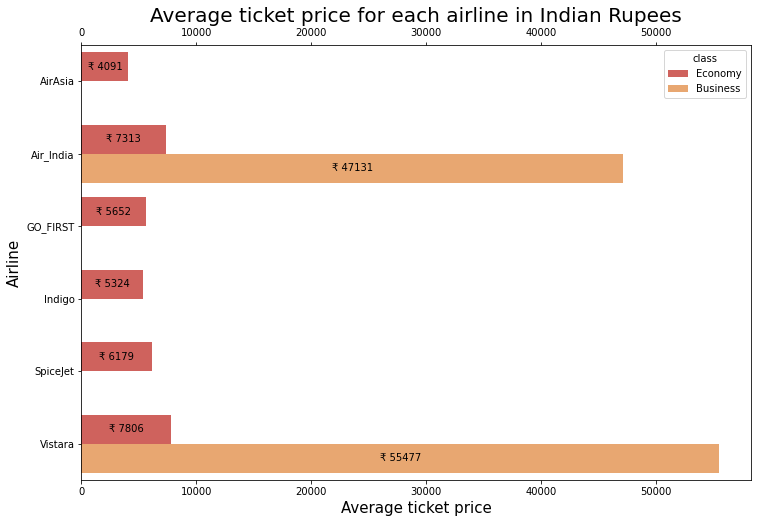

In [8]:
plt.figure(figsize = (12,8))
sns.set_palette("Spectral")
ax = sns.barplot(data = df_air , y = "airline", x = "price", hue = "class")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

ax.bar_label(ax.containers[0], label_type = "center", fmt = "₹ %d")
ax.bar_label(ax.containers[1], label_type = "center", fmt = "₹ %d")

plt.ylabel("Airline", size = 15)
plt.xlabel("Average ticket price", size = 15)
plt.title("Average ticket price for each airline in Indian Rupees", size = 20)

plt.savefig("avg_price_airline.png")
plt.show()

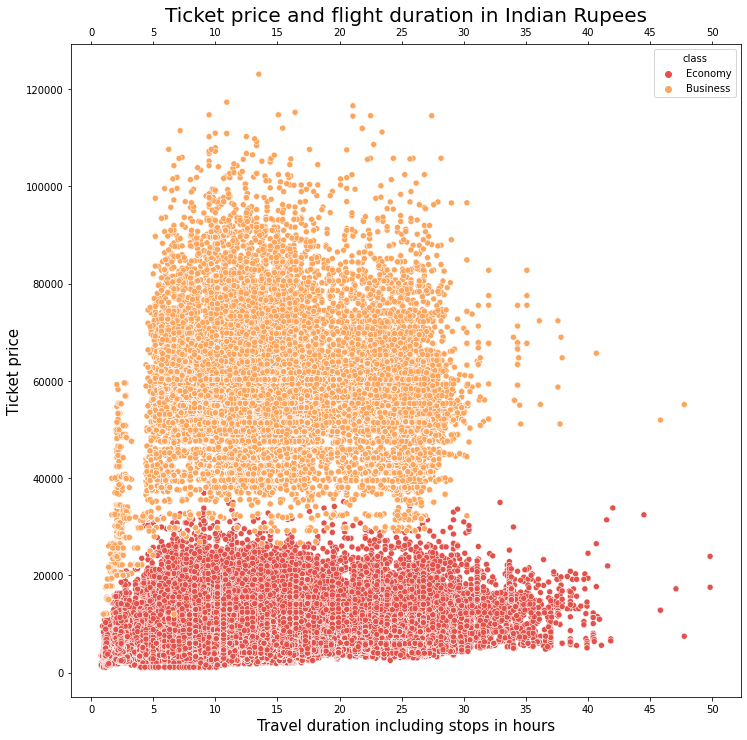

In [9]:
plt.figure(figsize = (12,12))
sns.set_palette("Spectral")
ax = sns.scatterplot(data = df , y = "price", x = "duration", hue = "class")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

plt.ylabel("Ticket price", size = 15)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.xlabel("Travel duration including stops in hours", size = 15)
plt.title("Ticket price and flight duration in Indian Rupees", size = 20)

plt.savefig("avg_price_class.png")
plt.show()

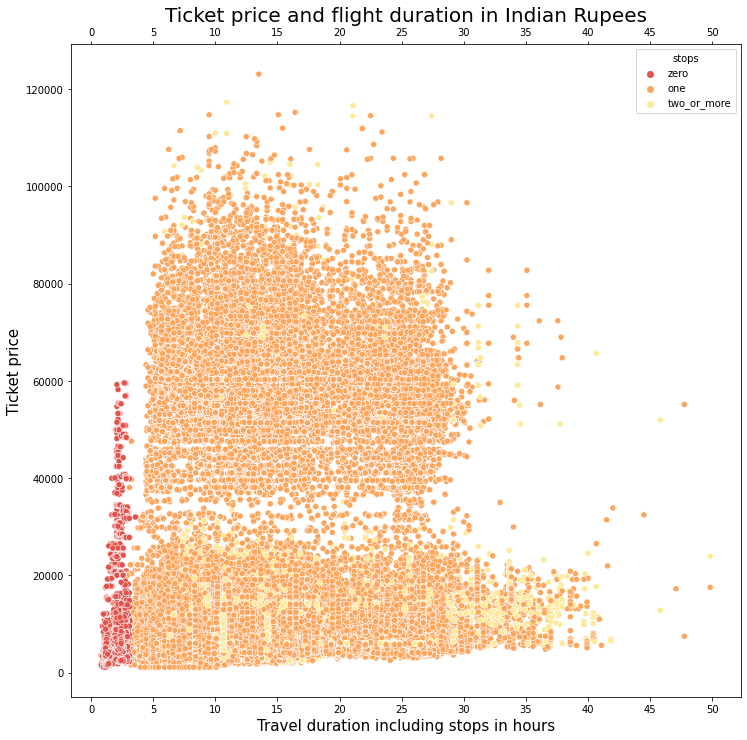

In [10]:
plt.figure(figsize = (12,12))
sns.set_palette("Spectral")
ax = sns.scatterplot(data = df , y = "price", x = "duration", hue = "stops")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

plt.ylabel("Ticket price", size = 15)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])
plt.xlabel("Travel duration including stops in hours", size = 15)
plt.title("Ticket price and flight duration in Indian Rupees", size = 20)

plt.savefig("duration_price_stop.png")
plt.show()

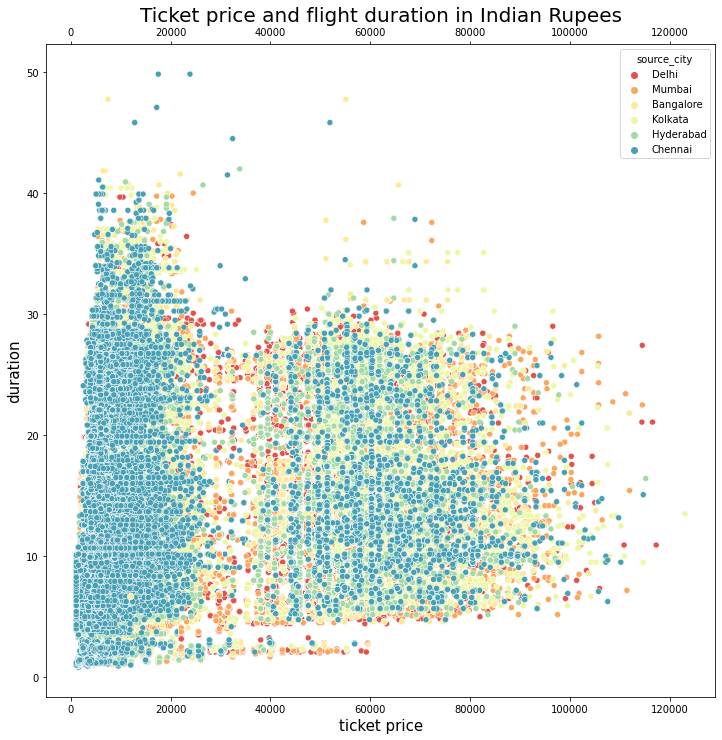

In [288]:
plt.figure(figsize = (12,12))
sns.set_palette("Spectral")
ax = sns.scatterplot(data = df , y = "duration", x = "price", hue = "source_city")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

plt.ylabel("duration", size = 15)
plt.xlabel("ticket price", size = 15)
plt.title("Ticket price and flight duration in Indian Rupees", size = 20)

#plt.savefig("avg_sum_airline.png", transparent = True, bbox_inchesstr = "Bbox" )
plt.show()

In [11]:
df_s_city = df.groupby(["source_city","class"]).mean().reset_index()
df_s_city

,source_city,class,duration,days_left,price
0,Bangalore,Business,13.869197,25.863208,53723.539687
1,Bangalore,Economy,11.179923,25.997951,6582.057019
2,Chennai,Business,14.141124,25.731503,54140.530529
3,Chennai,Economy,12.215480,26.270108,6606.279699
4,Delhi,Business,12.872845,25.631524,48697.983457
5,Delhi,Economy,10.937695,26.114324,6288.585423
6,Hyderabad,Business,14.036201,26.128283,50370.466200
7,Hyderabad,Economy,11.453507,26.488008,6235.770619
8,Kolkata,Business,15.072328,25.675722,56607.860536
9,Kolkata,Economy,12.502998,26.151457,7458.632354


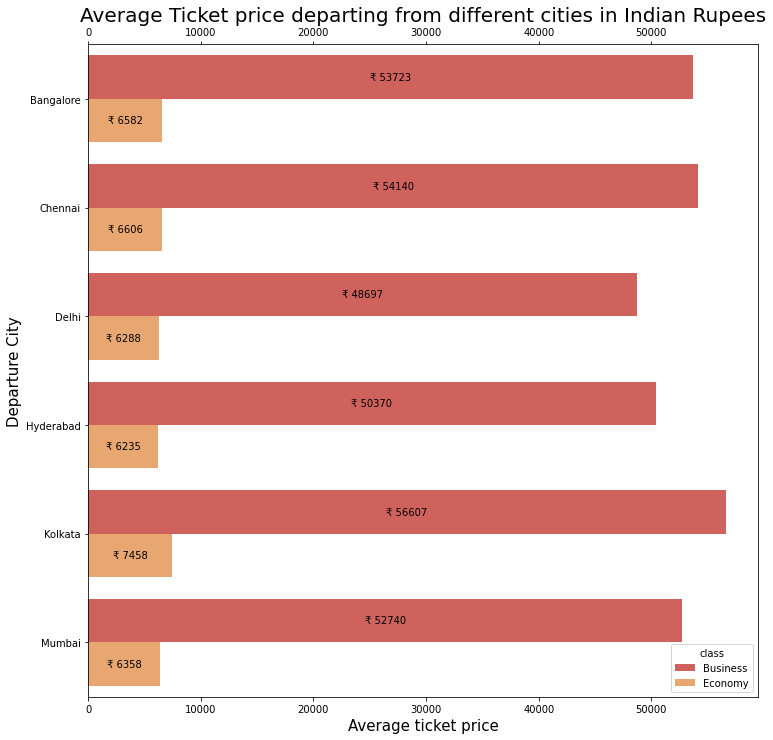

In [12]:
plt.figure(figsize = (12,12))
sns.set_palette("Spectral")
ax = sns.barplot(data = df_s_city , y = "source_city", x = "price", hue = "class")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

ax.bar_label(ax.containers[0], label_type = "center", fmt = "₹ %d")
ax.bar_label(ax.containers[1], label_type = "center", fmt = "₹ %d")

plt.ylabel("Departure City", size = 15)
plt.xlabel("Average ticket price", size = 15)
plt.title("Average Ticket price departing from different cities in Indian Rupees", size = 20)

plt.savefig("avg_sum_dep_city.png")
plt.show()

In [13]:
df_d_city = df.groupby("destination_city").mean().sort_values(by = "price", ascending = False).reset_index()
df_d_city

,destination_city,duration,days_left,price
0,Kolkata,13.214953,25.887633,21959.557556
1,Chennai,13.338900,26.020437,21953.323969
2,Bangalore,12.058039,26.048582,21593.955784
3,Mumbai,11.583355,25.885967,21372.529469
4,Hyderabad,13.381945,26.004166,20427.661284
5,Delhi,10.513310,26.178644,18436.767870


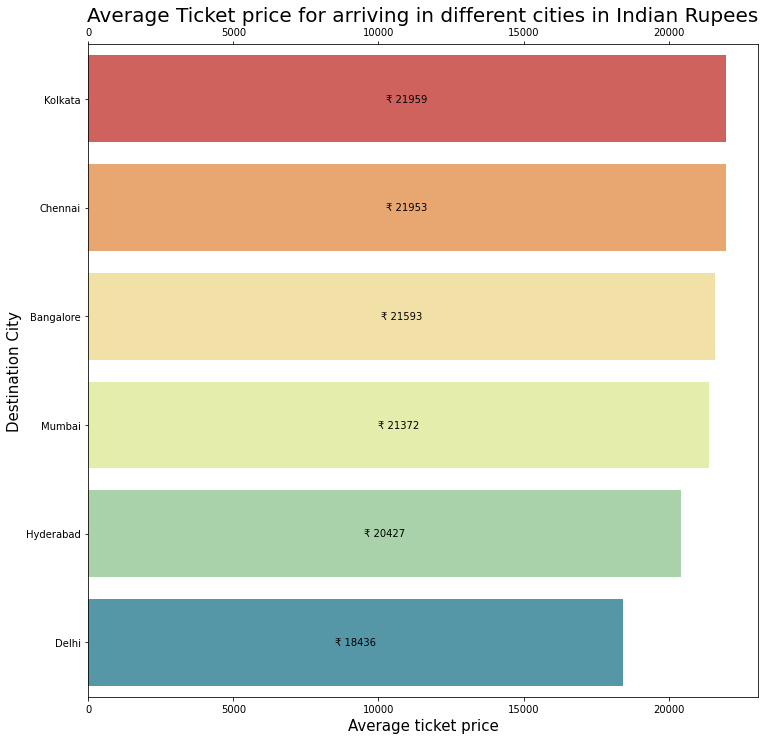

In [14]:
plt.figure(figsize = (12,12))
sns.set_palette("Spectral")
ax = sns.barplot(data = df_d_city , y = "destination_city", x = "price")
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

ax.bar_label(ax.containers[0], label_type = "center", fmt = "₹ %d")
plt.ylabel("Destination City", size = 15)
plt.xlabel("Average ticket price", size = 15)
plt.title("Average Ticket price for arriving in different cities in Indian Rupees", size = 20)

#plt.savefig("avg_sum_airline.png", transparent = True, bbox_inchesstr = "Bbox" )
plt.show()

In [15]:
df_days_left = df.groupby(["days_left","class"]).mean().reset_index()
df_days_left

,days_left,class,duration,price
0,1,Business,17.850489,65169.312030
1,1,Economy,13.673666,14613.179410
2,2,Business,15.661814,60455.848506
3,2,Economy,13.278893,13980.828244
4,3,Business,15.607542,60313.822331
...,...,...,...,...
93,47,Economy,11.396562,4669.652956
94,48,Business,13.720572,51558.758230
95,48,Economy,11.402028,4717.688994
96,49,Business,13.688259,51124.505820


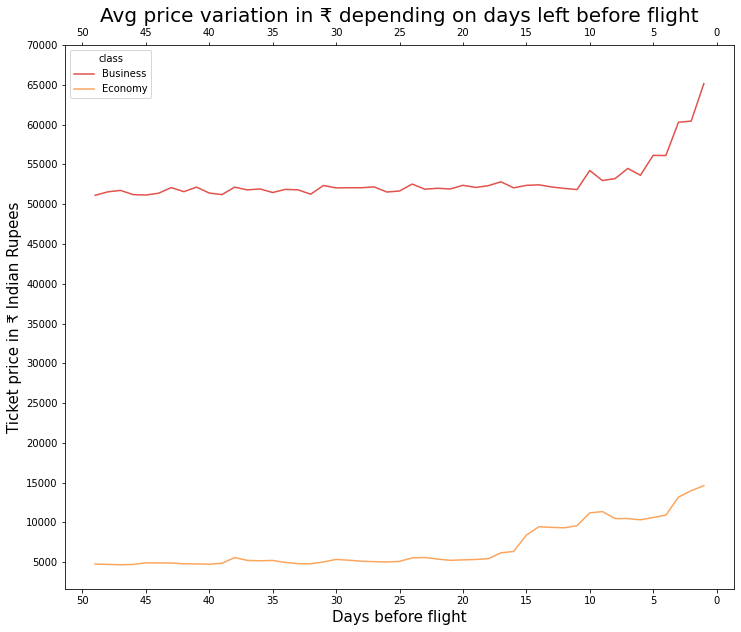

In [16]:
plt.figure(figsize = (12,10))
sns.set_palette("Spectral")
ax = sns.lineplot(data = df_days_left , y = "price", x = "days_left", hue = "class")
ax.invert_xaxis()

plt.yticks([5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000, 70000])
plt.xticks([50,45,40,35,30,25,20,15,10,5,0])

plt.ticklabel_format(style='plain', axis='both')
plt.tick_params(axis = "both", labeltop=True, top = True)

plt.ylabel("Ticket price in ₹ Indian Rupees", size = 15)
plt.xlabel("Days before flight", size = 15)
plt.title("Avg price variation in ₹ depending on days left before flight", size = 20)

plt.savefig("avg_price_days_left.png")
plt.show()

In [17]:
df_from_to = df.groupby(["source_city","destination_city"]).mean().sort_values(by = "price", ascending = False).reset_index()
df_from_to

,source_city,destination_city,duration,days_left,price
0,Chennai,Bangalore,13.952594,26.274141,25081.850454
1,Kolkata,Chennai,14.774182,25.694273,23660.361040
2,Bangalore,Kolkata,13.099143,25.882928,23500.061229
3,Bangalore,Chennai,14.480207,26.560062,23321.850078
4,Mumbai,Bangalore,11.612023,25.693209,23147.873807
5,Bangalore,Mumbai,10.905072,25.716902,23128.618672
6,Mumbai,Chennai,12.665900,25.409576,22781.899112
7,Chennai,Mumbai,12.374656,25.707111,22765.849647
8,Kolkata,Bangalore,13.792947,26.156861,22744.808428
9,Chennai,Kolkata,14.515774,25.811256,22669.932407


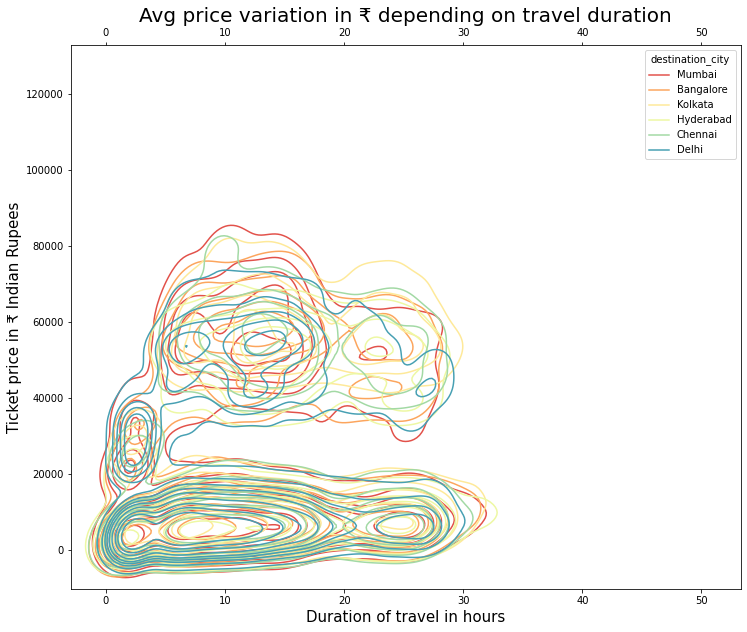

In [18]:
plt.figure(figsize = (12,10))
sns.set_palette("Spectral")
ax = sns.kdeplot(data = df , y = "price", x = "duration", hue = "destination_city")

plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)

plt.ylabel("Ticket price in ₹ Indian Rupees", size = 15)
plt.xlabel("Duration of travel in hours", size = 15)
plt.title("Avg price variation in ₹ depending on travel duration", size = 20)

#plt.savefig("avg_sum_airline.png", transparent = True, bbox_inchesstr = "Bbox" )
plt.show()

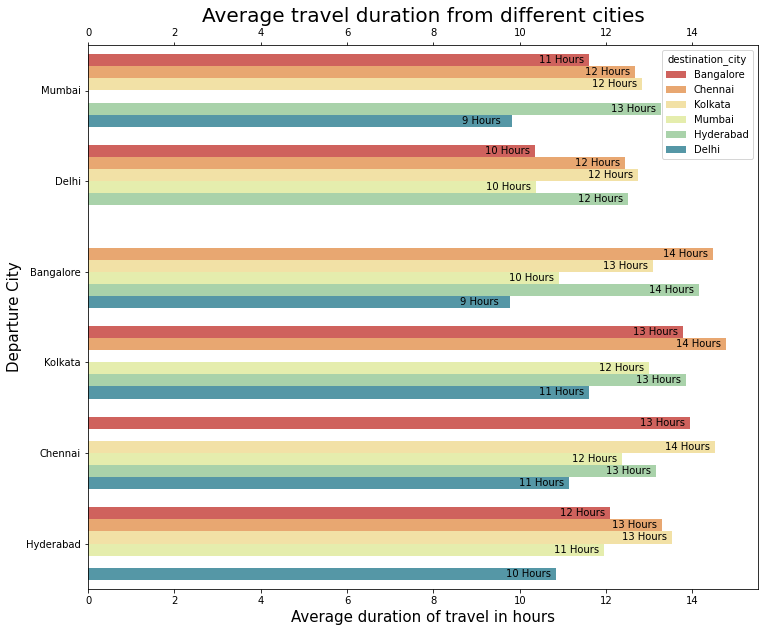

In [91]:
plt.figure(figsize = (12,10))
sns.set_palette("Spectral")
ax = sns.barplot(data = df_from_to , y = "source_city", x = "duration",hue = "destination_city", order = ["Mumbai","Delhi","Bangalore","Kolkata","Chennai","Hyderabad"])


ax.bar_label(ax.containers[0], label_type = "edge", fmt = "%d Hours", padding = -50)
ax.bar_label(ax.containers[1], label_type = "edge", fmt = "%d Hours", padding = -50)
ax.bar_label(ax.containers[2], label_type = "edge", fmt = "%d Hours", padding = -50)
ax.bar_label(ax.containers[3], label_type = "edge", fmt = "%d Hours", padding = -50)
ax.bar_label(ax.containers[4], label_type = "edge", fmt = "%d Hours", padding = -50)
ax.bar_label(ax.containers[5], label_type = "edge", fmt = "%d Hours", padding = -50)
plt.ticklabel_format(style='plain', axis='x')
plt.tick_params(axis = "x", labeltop=True, top = True)


plt.ylabel("Departure City", size = 15)
plt.xlabel("Average duration of travel in hours", size = 15)
plt.title("Average travel duration from different cities", size = 20)

plt.savefig("avg_duration_city.png")
plt.show()

In [20]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [77]:
df_dep_time = df.groupby(["departure_time","class"],sort = False).mean().reset_index()
df_dep_time

,departure_time,class,duration,days_left,price
0,Evening,Economy,12.578487,25.932499,6360.750741
1,Early_Morning,Economy,11.239388,26.128277,6560.315392
2,Morning,Economy,11.017778,25.929334,7119.019664
3,Afternoon,Economy,10.231977,26.270308,6473.095872
4,Night,Economy,13.096858,26.422799,6205.964764
5,Late_Night,Economy,6.625985,29.053082,4784.699486
6,Evening,Business,15.893580,25.335678,52695.837090
7,Night,Business,15.918486,25.616203,52512.726456
8,Early_Morning,Business,12.397489,25.997612,52446.000050
9,Morning,Business,11.929308,25.921120,53365.483091


In [60]:
#df_dep_time.sort_values(by = ["Early_Morning","Morning","Afternoon","Evening","Night","Late_Night"])


KeyError: 'Early_Morning'

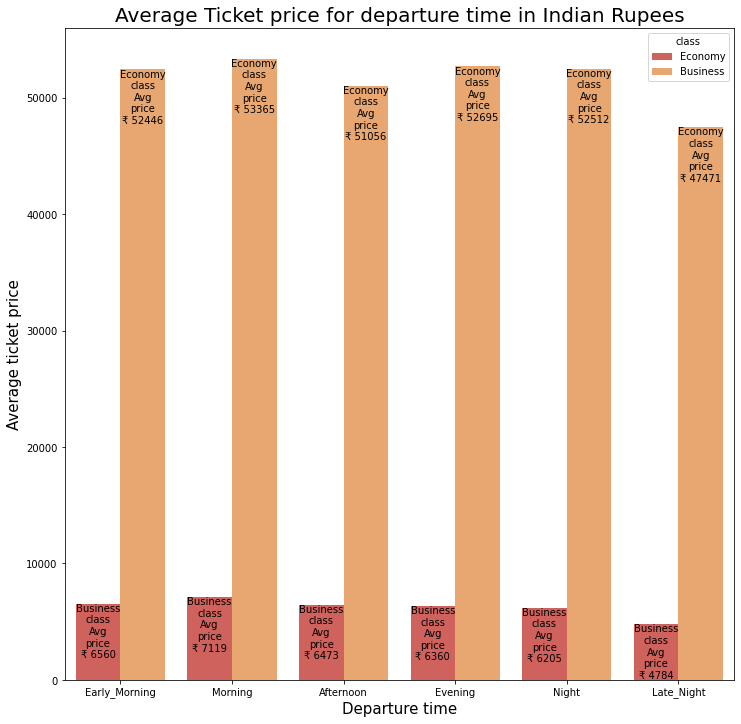

In [88]:
plt.figure(figsize = (12,12))
sns.set_palette("Spectral")
ax = sns.barplot(data = df_dep_time , x = "departure_time", y = "price", hue = "class", order= ["Early_Morning","Morning","Afternoon","Evening","Night","Late_Night"])
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis = "y", labeltop=True, top = True)


ax.bar_label(ax.containers[0], label_type = "edge", fmt = "Business\nclass\nAvg\nprice\n₹ %d",  padding=-56)
ax.bar_label(ax.containers[1], label_type = "edge", fmt = "Economy\nclass\nAvg\nprice\n₹ %d",  padding=-56)

plt.xlabel("Departure time", size = 15)
plt.ylabel("Average ticket price", size = 15)
plt.title("Average Ticket price for departure time in Indian Rupees", size = 20)

plt.savefig("avg_price_dep_time.png")
plt.show()

In [ ]:
df_day_left = df.groupby(["days_left","airline"]).mean().reset_index()
df_day_left

In [ ]:
plt.figure(figsize = (16,12))
sns.set_palette("Spectral")
ax = sns.barplot(data = df_day_left , x = "days_left", y = "price", hue = "airline")
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis = "y", labeltop=True, top = True)

#ax.bar_label(ax.containers[0], label_type = "center", fmt = "Avg ₹ %d")
plt.xlabel("Days left", size = 15)
plt.ylabel("Average ticket price", size = 15)
plt.title("Average Ticket price for days left untill departure in Indian Rupees", size = 20)

#plt.savefig("avg_sum_airline.png", transparent = True, bbox_inchesstr = "Bbox" )
plt.show()

In [ ]:
sns.displot(data = df, x="days_left", y = "price", row="airline", hue = "class",height=10, facet_kws=dict(margin_titles=True),
)

In [ ]:
df

In [ ]:
df.corr()